In [1]:
import pandas as pd
import numpy as np
import pickle

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score,fbeta_score,classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [3]:
nltk.download('stopwords')
stop=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss=SnowballStemmer("english")
ps=PorterStemmer()


In [5]:
msg_df=pd.read_csv("E:\SMS.csv",engine="python")
msg_df.shape

(5573, 2)

In [6]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
msg_df=pd.read_csv("E:\SMS.csv",engine="python",names=["class","message"])
msg_df.shape
msg_df.head(5)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
msg_df.describe()


,class,message
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [9]:
msg_df.isna()

,class,message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5569,False,False
5570,False,False
5571,False,False
5572,False,False


In [10]:
msg_df["class"].value_counts()

ham     4827
spam     747
Name: class, dtype: int64

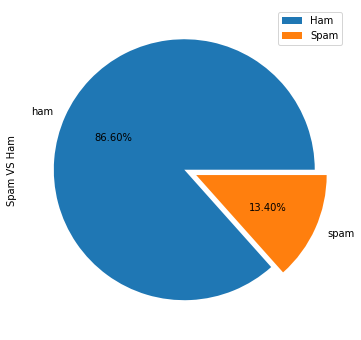

In [11]:
msg_df["class"].value_counts().plot(kind="pie",explode=[0,0.1],figsize=(6,6),autopct="%1.2f%%")
plt.ylabel("Spam VS Ham")
plt.legend(["Ham","Spam"])
plt.show()

In [12]:
msg_df['length']=msg_df['message'].apply(len)
msg_df.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
msg_df.length.describe()

count    5574.000000
mean       80.585396
std        59.910725
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
msg_df[msg_df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

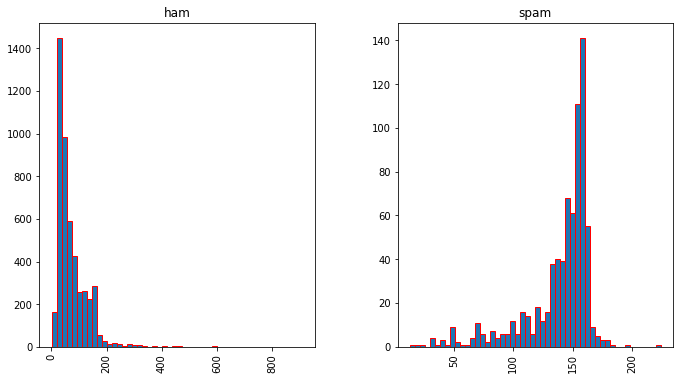

In [15]:
msg_df.hist(column="length",by="class",bins=50,figsize=(11,6),ec="red")

In [16]:
import string
import re
def cleantext(message):
    message=re.sub('[^ a-zA-Z]','',message)
    message=message.lower()
    message=message.split()
    words=[ss.stem(word) for word in message if word not in stop]
    return " ".join(words)

msg_df["message"]=msg_df["message"].apply(cleantext)
msg_df.head(n=10)

,class,message,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkts st ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah dont think goe usf live around though,61
5,spam,freemsg hey darl week word back id like fun st...,148
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea pri...,158
9,spam,mobil month u r entitl updat latest colour mob...,154


In [17]:
spam_messages=msg_df[msg_df["class"]=="spam"]["message"]
ham_messages=msg_df[msg_df["class"]=="ham"]["message"]

In [18]:
spam_messages

2       free entri wkli comp win fa cup final tkts st ...
5       freemsg hey darl week word back id like fun st...
8       winner valu network custom select receivea pri...
9       mobil month u r entitl updat latest colour mob...
11      six chanc win cash pound txt csh send cost pda...
                              ...                        
5539    want explicit sex sec ring cost pmin gsex pobo...
5542    ask mobil chatlin inclu free min india cust se...
5549    contract mobil mnths latest motorola nokia etc...
5568    remind get pound free call credit detail great...
5569    nd time tri contact u u pound prize claim easi...
Name: message, Length: 747, dtype: object

In [19]:
ham_messages

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5567                                              huh lei
5570                                b go esplanad fr home
5571                              piti mood soani suggest
5572    guy bitch act like id interest buy someth els ...
5573                                       rofl true name
Name: message, Length: 4827, dtype: object

In [20]:
nltk.download('punkt')
spam_words=[]
ham_words=[]

def extractSpamWords(spamMessages):
    global spam_words
    words=[word for word in word_tokenize(spamMessages)]
    spam_words=spam_words+words
    
def extractHamWords(hamMessages):
    global ham_words
    words=[word for word in word_tokenize(hamMessages)]
    ham_words=ham_words+words
    
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       None
1       None
3       None
4       None
6       None
        ... 
5567    None
5570    None
5571    None
5572    None
5573    None
Name: message, Length: 4827, dtype: object

In [21]:
spam_words

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 'over',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hour',
 'mobil',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 'six',
 'chanc',
 'win',
 'cash',
 'pound',
 'txt',
 'csh',
 'send',
 'cost',
 'pday',
 'day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'tc',
 'wwwdbuknet',
 'lccltd',
 'pobox',
 'ldnwarw',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next'

In [22]:
ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'dont',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 'copi',
 'friend',
 'callertun',
 'im',
 'gon',
 'na',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'ive',
 'cri',
 'enough',
 'today',
 'ive',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watch',
 'eh',
 'u',
 'rememb',
 'spell',
 'name',
 'yes',
 'v',
 'naughti',
 'make

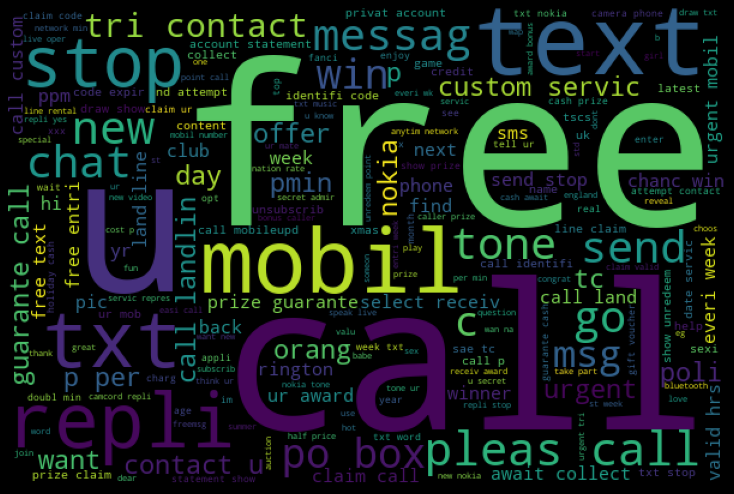

In [23]:
spam_wordcloud=WordCloud(width=600,height=400).generate(" ".join(spam_words))
plt.figure(figsize=(10,8), facecolor="k")
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

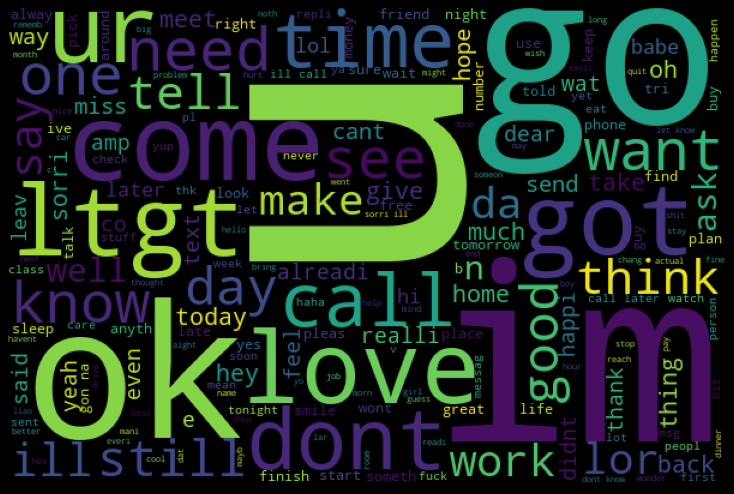

In [24]:
ham_wordcloud=WordCloud(width=600,height=400).generate(" ".join(ham_words))
plt.figure(figsize=(10,8), facecolor="k")
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:
def encodeCategory(cat):
    if cat=="spam":
        return 1
    else:
        return 0

msg_df["class"]=msg_df["class"].apply(encodeCategory)

In [26]:
msg_df

,class,message,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkts st ...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61
...,...,...,...
5569,1,nd time tri contact u u pound prize claim easi...,161
5570,0,b go esplanad fr home,37
5571,0,piti mood soani suggest,57
5572,0,guy bitch act like id interest buy someth els ...,125


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit(msg_df["message"])
x.vocabulary_

{'go': 2361,
 'jurong': 3133,
 'point': 4624,
 'crazi': 1284,
 'avail': 403,
 'bugi': 793,
 'great': 2451,
 'world': 6892,
 'la': 3272,
 'buffet': 791,
 'cine': 1068,
 'got': 2414,
 'amor': 212,
 'wat': 6684,
 'ok': 4242,
 'lar': 3304,
 'joke': 3099,
 'wif': 6800,
 'oni': 4272,
 'free': 2174,
 'entri': 1833,
 'wkli': 6850,
 'comp': 1163,
 'win': 6813,
 'fa': 1949,
 'cup': 1333,
 'final': 2052,
 'tkts': 6202,
 'st': 5705,
 'may': 3661,
 'text': 6057,
 'receiv': 4952,
 'questionstd': 4866,
 'txt': 6386,
 'ratetc': 4911,
 'appli': 287,
 'over': 4358,
 'dun': 1710,
 'say': 5215,
 'earli': 1726,
 'hor': 2732,
 'alreadi': 184,
 'nah': 3968,
 'dont': 1631,
 'think': 6125,
 'goe': 2372,
 'usf': 6519,
 'live': 3428,
 'around': 325,
 'though': 6143,
 'freemsg': 2182,
 'hey': 2643,
 'darl': 1387,
 'week': 6725,
 'word': 6881,
 'back': 442,
 'id': 2838,
 'like': 3397,
 'fun': 2239,
 'still': 5759,
 'tb': 5995,
 'xxx': 7014,
 'std': 5736,
 'chgs': 1017,
 'send': 5286,
 'rcv': 4922,
 'even': 1880,
 

In [28]:
x=cv.fit_transform(msg_df["message"])
print(x.shape)
x=cv.fit_transform(msg_df["message"]).toarray()
x

(5574, 7138)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
df=pd.DataFrame(x,columns=cv.get_feature_names_out())
df
df['len']=msg_df['length']
df

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,len
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,155
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,161
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125


In [30]:
y=msg_df['class']
y

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: class, Length: 5574, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(df,y,test_size=0.20,random_state=0)

In [32]:
from sklearn.naive_bayes import MultinomialNB
spam_detector=MultinomialNB().fit(X_train,y_train)
y_pred=spam_detector.predict(X_test)

In [33]:
l=np.array(X_test)
print("test data is:",l)
print("\n")
print("length of x_test is",(len(l)))

test data is: [[  0   0   0 ...   0   0  66]
 [  0   0   0 ...   0   0  34]
 [  0   0   0 ...   0   0  83]
 ...
 [  0   0   0 ...   0   0  50]
 [  0   0   0 ...   0   0 116]
 [  0   0   0 ...   0   0 138]]


length of x_test is 1115


In [34]:
print("predicted value is ",y_pred)

predicted value is  [0 0 0 ... 0 0 0]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       950
           1       0.91      0.92      0.92       165

    accuracy                           0.97      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.97      0.97      1115



In [36]:
actual=np.array(y_test)
print("length of actual is :",len(actual))
print("\n")

count=0
for i in range(len(y_pred)):
    if y_pred[i]==actual[i]:
        count=count+1
print(" total correct prediction is:", count)

length of actual is : 1115


 total correct prediction is: 1087


In [37]:
print("Accuracy using Niave-bayes is:",(accuracy_score(y_test,y_pred)))

Accuracy using Niave-bayes is: 0.9748878923766816


In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
dt_predict=model.predict(X_test)
print("Accuracy of decision tree is:",metrics.accuracy_score(dt_predict,y_test))

Accuracy of decision tree is: 0.9614349775784753


In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
pred=(classifier.predict(X_test))
print("Accuracy of KNN is:",accuracy_score(y_test,pred))

Accuracy of KNN is: 0.8878923766816144
